# **HW2** 
1. fashion-mnist 데이터에 CNN 모형( 제 4 장의 CNN 모형을 적용해도 됨) 을 subclassing API 로 적합하되,

2. kenel initializer, activation function, normalization, dropout, 그리고 regularization 을 이용하여 과대적합되지 않은 모형을 제시하라.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dropout, Input, MaxPooling2D, Flatten, Dense, BatchNormalization

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# adjusting to 0 ~ 1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, x_test.shape)

# reshaping
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape)  

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1)


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# 같은 모델을 Sequential API로
from tensorflow.keras.models import Sequential
kernel_size=3
model = Sequential()
model.add(Conv2D(filters=16, activation='relu', kernel_size=kernel_size, kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(BatchNormalization(momentum=0.9))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=32, activation='relu', kernel_size=kernel_size,  kernel_initializer='lecun_normal'))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=64, kernel_size=kernel_size, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)              

y_train은 펼치지 않고 loss를 sparse categorical cross entropy 사용!

In [ ]:
from tensorflow.keras.layers import Conv2D, Dropout, Input, MaxPooling2D, Flatten, Dense, BatchNormalization
class TinoutModel(tf.keras.models.Model):
  def __init__(self, kernel_size=3, **kwargs):
    super().__init__(**kwargs)
    self.h1 = Conv2D(filters=16, activation='relu', kernel_size=kernel_size, kernel_initializer='he_normal')   # 우선 __init__에 필요한 레이어들을 정의
    self.h2 = Conv2D(filters=32, activation='relu', kernel_size=kernel_size,  kernel_initializer='he_normal')
    self.h3 = Conv2D(filters=64, kernel_size=kernel_size, activation='relu')
    self.p = MaxPooling2D(2)
    self.bn = BatchNormalization(momentum=0.9)
    self.f = Flatten()
    self.drop = Dropout(0.5)
    self.out = Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.L1(0.01))  # 분류 라벨 개수만큼 노드수 나와야함!!

  # functional API로 작성
  def call(self, x):
    x = self.h1(x)
    x = self.bn(x)
    x = self.p(x)
    x = self.h2(x)
    x = self.p(x)
    x = self.h3(x)
    x = self.f(x)
    x = self.drop(x)
    out = self.out(x)
    return out
model = TinoutModel()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.25, batch_size=64)

Epoch 1/10
704/704 [==============================] - 4s 5ms/step - loss: 2.0472 - accuracy: 0.6788 - val_loss: 0.7231 - val_accuracy: 0.8036
Epoch 2/10
704/704 [==============================] - 3s 4ms/step - loss: 0.7431 - accuracy: 0.8032 - val_loss: 0.6240 - val_accuracy: 0.8304
Epoch 3/10
704/704 [==============================] - 3s 4ms/step - loss: 0.6538 - accuracy: 0.8310 - val_loss: 0.5536 - val_accuracy: 0.8571
Epoch 4/10
704/704 [==============================] - 3s 4ms/step - loss: 0.6041 - accuracy: 0.8436 - val_loss: 0.5244 - val_accuracy: 0.8683
Epoch 5/10
704/704 [==============================] - 3s 4ms/step - loss: 0.5758 - accuracy: 0.8535 - val_loss: 0.5015 - val_accuracy: 0.8695
Epoch 6/10
704/704 [==============================] - 3s 4ms/step - loss: 0.5518 - accuracy: 0.8595 - val_loss: 0.4724 - val_accuracy: 0.8822
Epoch 7/10
704/704 [==============================] - 3s 4ms/step - loss: 0.5368 - accuracy: 0.8641 - val_loss: 0.4959 - val_accuracy: 0.8733
Epoch 

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7252 - accuracy: 0.7044 - val_loss: 0.6814 - val_accuracy: 0.8276
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7025 - accuracy: 0.8248 - val_loss: 0.5604 - val_accuracy: 0.8665
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.6244 - accuracy: 0.8478 - val_loss: 0.5477 - val_accuracy: 0.8647
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5858 - accuracy: 0.8543 - val_loss: 0.5346 - val_accuracy: 0.8688
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5632 - accuracy: 0.8624 - val_loss: 0.5292 - val_accuracy: 0.8722
Epoch 6/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5412 - accuracy: 0.8682 - val_loss: 0.4749 - val_accuracy: 0.8877
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5263 - accuracy: 0.8740 - val_loss: 0.4813 - val_accuracy:

<Figure size 720x288 with 0 Axes>

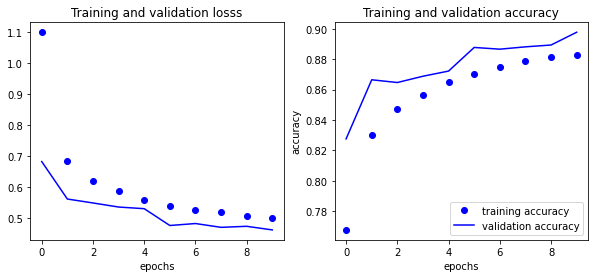

In [ ]:
plt.figure(figsize=(10,4))
loss=history.history['loss']
loss_val=history.history['val_loss']
accuracy=history.history['accuracy']
accuracy_val=history.history['val_accuracy']

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(loss,'bo',label='training loss')
plt.plot( loss_val,'b', label='validation loss' )
plt.title('Training and validation losss')
plt.xlabel('epochs')

plt.subplot(1,2,2)
plt.plot(accuracy,'bo',label='training accuracy')
plt.plot(accuracy_val,'b', label='validation accuracy' )
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(test_acc)  # test data도 overfitting이 발생하지 않은 모습이다!

313/313 [==============================] - 1s 2ms/step - loss: 0.4745 - accuracy: 0.8926
0.8925999999046326


In [ ]:
from tensorflow.keras.layers import Conv2D, Dropout, Input, MaxPooling2D, Flatten, Dense, BatchNormalization

class TinoutModel(tf.keras.models.Model):

  def __init__(self, kernel_size=3, **kwargs):
    
    super().__init__(**kwargs)
    self.h1 = Conv2D(filters=16, activation='relu', kernel_size=kernel_size, kernel_initializer='he_normal')   # 우선 __init__에 필요한 레이어들을 정의
    self.h2 = Conv2D(filters=32, activation='relu', kernel_size=kernel_size,  kernel_initializer='lecun_normal')
    self.h3 = Conv2D(filters=64, kernel_size=kernel_size, activation='relu')
    self.p = MaxPooling2D(2)
    self.bn = BatchNormalization(momentum=0.9)
    self.f = Flatten()
    self.drop = Dropout(0.5)
    self.out = Dense(10, activation='softmax')  # 분류 라벨 개수만큼 노드수 나와야함!!

  # functional API로 작성
  def call(self, x):
    x = self.h1(x)
    x = self.bn(x)
    x = self.p(x)
    x = self.h2(x)
    x = self.p(x)
    x = self.h3(x)
    x = self.f(x)
    x = self.drop(x)
    out = self.out(x)
    return out

model = TinoutModel()

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


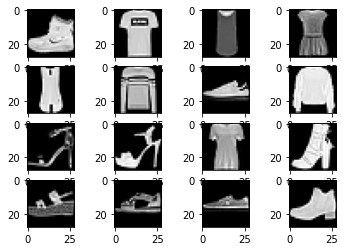

Epoch 1/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8336 - accuracy: 0.6902 - val_loss: 0.4371 - val_accuracy: 0.8417
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4112 - accuracy: 0.8530 - val_loss: 0.4018 - val_accuracy: 0.8467
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3447 - accuracy: 0.8760 - val_loss: 0.3407 - val_accuracy: 0.8772
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3101 - accuracy: 0.8862 - val_loss: 0.3376 - val_accuracy: 0.8766
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2812 - accuracy: 0.8957 - val_loss: 0.3056 - val_accuracy: 0.8887
Epoch 6/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2599 - accuracy: 0.9051 - val_loss: 0.2924 - val_accuracy: 0.8946
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2373 - accuracy: 0.9114 - val_loss: 0.2809 - val_accuracy:

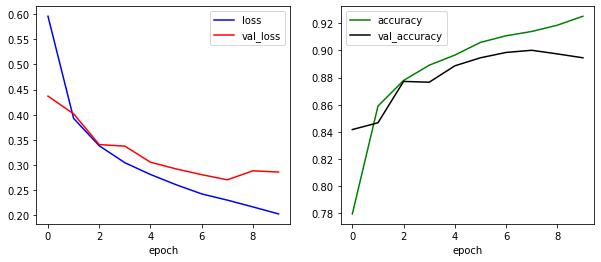

313/313 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.8936
0.8935999870300293


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# load fashion_mnist data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


# adjusting to 0 ~ 1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# reshaping
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# plotting
plt.figure()
for c in range(16):
    plt.subplot(4,4,c+1)
    plt.imshow(x_train[c].reshape(28,28), cmap='gray')
plt.show()

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=16, activation='relu')
    self.conv2 = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, activation='relu')
    self.conv3 = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, activation='relu')
    self.pool = tf.keras.layers.MaxPooling2D((2, 2))
    self.flatten = tf.keras.layers.Flatten()
    self.d1 = tf.keras.layers.Dense(32, activation='relu')
    self.d2 = tf.keras.layers.Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.pool(x)
    x = self.conv3(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyModel()

# compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, validation_split=0.25)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

# model evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)

print(test_acc)